# Przewidywanie wyniku meczu piłkarskiego

## Przygotowanie zbioru

Zacznijmy od wczytania danych

In [4]:
import pandas as pd
import numpy as np

df = pd.read_pickle('../data/ml_data.pkl')

In [5]:
df.head()

,stage,home_team_goal,away_team_goal,league_name_Belgium Jupiler League,league_name_England Premier League,league_name_France Ligue 1,league_name_Germany 1. Bundesliga,league_name_Italy Serie A,league_name_Netherlands Eredivisie,league_name_Poland Ekstraklasa,...,away_player_4_age,away_player_5_age,away_player_6_age,away_player_7_age,away_player_8_age,away_player_9_age,away_player_10_age,away_player_11_age,month,year
0,24,2,1,1,0,0,0,0,0,0,...,21,21,22,23,27,27,26,19,2,2009
1,22,2,2,1,0,0,0,0,0,0,...,25,23,25,22,19,29,23,21,12,2010
2,8,0,2,1,0,0,0,0,0,0,...,24,22,25,22,20,19,22,21,9,2010
3,6,2,2,1,0,0,0,0,0,0,...,24,22,29,25,22,19,22,21,9,2010
4,30,0,1,1,0,0,0,0,0,0,...,23,23,29,23,25,19,23,21,3,2011


In [6]:
def print_full(x):
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 2000)
    pd.set_option('display.float_format', '{:20,.2f}'.format)
    pd.set_option('display.max_colwidth', None)
    display(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.float_format')
    pd.reset_option('display.max_colwidth')

Popatrzmy na kolumny jakie ma nasza wczytana tabela

In [7]:
print_full(df.columns.values)

array(['stage', 'home_team_goal', 'away_team_goal',
       'league_name_Belgium Jupiler League',
       'league_name_England Premier League', 'league_name_France Ligue 1',
       'league_name_Germany 1. Bundesliga', 'league_name_Italy Serie A',
       'league_name_Netherlands Eredivisie',
       'league_name_Poland Ekstraklasa',
       'league_name_Portugal Liga ZON Sagres',
       'league_name_Scotland Premier League',
       'league_name_Spain LIGA BBVA',
       'league_name_Switzerland Super League', 'avg_odds_home_win',
       'avg_odds_draw', 'avg_odds_away_win', 'home_team_buildUpPlaySpeed',
       'home_team_buildUpPlayDribbling', 'home_team_buildUpPlayPassing',
       'home_team_chanceCreationPassing',
       'home_team_chanceCreationCrossing',
       'home_team_chanceCreationShooting', 'home_team_defencePressure',
       'home_team_defenceAggression', 'home_team_defenceTeamWidth',
       'home_team_buildUpPlayPositioningClass_Free_Form',
       'home_team_buildUpPlayPositionin

Nasze dane składają się z:
- kolejka rozgrywania meczu,
- liczba strzelonych goli przez drużynę grającą u siebie
- liczba strzelonych goli przez drużynę grającą na wyjeździe
- liga rozgrywania meczu (one hot encoding)
- średnie kursy bukmacherów
- statystki drużyny z gry FIFA (0-100),
- statystyki piłkarz z gry FIFA (0-100)
- data rozegrania meczu (miesiąc, rok)

Jako, że chcemy przewidywać, która drużyna wygra lub czy będzie remis musimy zmienić kolumny z golami strzelonymi przez drużyny na one hot encoding

In [8]:
df["result"] = df.apply(lambda r: (-1 if r["home_team_goal"] > r["away_team_goal"] else 1 if r["home_team_goal"] < r["away_team_goal"] else 0), axis=1)

In [9]:
df['result']

0       -1
1        0
2        1
3        0
4        1
        ..
19607   -1
19608   -1
19609    0
19610   -1
19611   -1
Name: result, Length: 19612, dtype: int64

In [10]:
df['home_team_goal']

0        2
1        2
2        0
3        2
4        0
        ..
19607    4
19608    3
19609    1
19610    2
19611    2
Name: home_team_goal, Length: 19612, dtype: int64

In [11]:
df['away_team_goal']

0        1
1        2
2        2
3        2
4        1
        ..
19607    0
19608    0
19609    1
19610    0
19611    0
Name: away_team_goal, Length: 19612, dtype: int64

In [12]:
df = pd.get_dummies(df, columns=['result'])

In [13]:
df

,stage,home_team_goal,away_team_goal,league_name_Belgium Jupiler League,league_name_England Premier League,league_name_France Ligue 1,league_name_Germany 1. Bundesliga,league_name_Italy Serie A,league_name_Netherlands Eredivisie,league_name_Poland Ekstraklasa,...,away_player_7_age,away_player_8_age,away_player_9_age,away_player_10_age,away_player_11_age,month,year,result_-1,result_0,result_1
0,24,2,1,1,0,0,0,0,0,0,...,23,27,27,26,19,2,2009,1,0,0
1,22,2,2,1,0,0,0,0,0,0,...,22,19,29,23,21,12,2010,0,1,0
2,8,0,2,1,0,0,0,0,0,0,...,22,20,19,22,21,9,2010,0,0,1
3,6,2,2,1,0,0,0,0,0,0,...,25,22,19,22,21,9,2010,0,1,0
4,30,0,1,1,0,0,0,0,0,0,...,23,25,19,23,21,3,2011,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19607,28,4,0,0,0,0,1,0,0,0,...,26,32,29,26,29,4,2009,1,0,0
19608,12,3,0,0,0,0,1,0,0,0,...,30,27,31,25,28,11,2008,1,0,0
19609,20,1,1,0,0,0,1,0,0,0,...,30,29,32,25,29,2,2009,0,1,0
19610,18,2,0,0,0,0,1,0,0,0,...,30,27,32,27,29,1,2009,1,0,0


In [14]:
df = df.drop(["home_team_goal", "away_team_goal"], axis=1)

In [15]:
df = df.rename(columns={"result_-1": "win", "result_0": "draw", "result_1": "lost"})

In [131]:
print_full(df.head())

,league_name_Belgium Jupiler League,league_name_England Premier League,league_name_France Ligue 1,league_name_Germany 1. Bundesliga,league_name_Italy Serie A,league_name_Netherlands Eredivisie,league_name_Poland Ekstraklasa,league_name_Portugal Liga ZON Sagres,league_name_Scotland Premier League,league_name_Spain LIGA BBVA,league_name_Switzerland Super League,home_team_buildUpPlaySpeed,home_team_buildUpPlayDribbling,home_team_buildUpPlayPassing,home_team_chanceCreationPassing,home_team_chanceCreationCrossing,home_team_chanceCreationShooting,home_team_defencePressure,home_team_defenceAggression,home_team_defenceTeamWidth,home_team_buildUpPlayPositioningClass_Free_Form,home_team_buildUpPlayPositioningClass_Organised,home_team_chanceCreationPositioningClass_Free_Form,home_team_chanceCreationPositioningClass_Organised,home_team_defenceDefenderLineClass_Cover,home_team_defenceDefenderLineClass_Offside_Trap,away_team_buildUpPlaySpeed,away_team_buildUpPlayDribbling,away_team_buildUpPlayPassing,away_team_chanceCreationPassing,away_team_chanceCreationCrossing,away_team_chanceCreationShooting,away_team_defencePressure,away_team_defenceAggression,away_team_defenceTeamWidth,away_team_buildUpPlayPositioningClass_Free_Form,away_team_buildUpPlayPositioningClass_Organised,away_team_chanceCreationPositioningClass_Free_Form,away_team_chanceCreationPositioningClass_Organised,away_team_defenceDefenderLineClass_Cover,away_team_defenceDefenderLineClass_Offside_Trap,home_player_1_height,home_player_1_weight,home_player_1_overall_rating,home_player_1_potential,home_player_1_attacking_work_rate,home_player_1_defensive_work_rate,home_player_1_crossing,home_player_1_finishing,home_player_1_heading_accuracy,home_player_1_short_passing,home_player_1_volleys,home_player_1_dribbling,home_player_1_curve,home_player_1_free_kick_accuracy,home_player_1_long_passing,home_player_1_ball_control,home_player_1_acceleration,home_player_1_sprint_speed,home_player_1_agility,home_player_1_reactions,home_player_1_balance,home_player_1_shot_power,home_player_1_jumping,home_player_1_stamina,home_player_1_strength,home_player_1_long_shots,home_player_1_aggression,home_player_1_interceptions,home_player_1_positioning,home_player_1_vision,home_player_1_penalties,home_player_1_marking,home_player_1_standing_tackle,home_player_1_sliding_tackle,home_player_1_gk_diving,home_player_1_gk_handling,home_player_1_gk_kicking,home_player_1_gk_positioning,home_player_1_gk_reflexes,home_player_1_preferred_foot_left,home_player_1_preferred_foot_right,home_player_2_height,home_player_2_weight,home_player_2_overall_rating,home_player_2_potential,home_player_2_attacking_work_rate,home_player_2_defensive_work_rate,home_player_2_crossing,home_player_2_finishing,home_player_2_heading_accuracy,home_player_2_short_passing,home_player_2_volleys,home_player_2_dribbling,home_player_2_curve,home_player_2_free_kick_accuracy,home_player_2_long_passing,home_player_2_ball_control,home_player_2_acceleration,home_player_2_sprint_speed,home_player_2_agility,home_player_2_reactions,home_player_2_balance,home_player_2_shot_power,home_player_2_jumping,home_player_2_stamina,home_player_2_strength,home_player_2_long_shots,home_player_2_aggression,home_player_2_interceptions,home_player_2_positioning,home_player_2_vision,home_player_2_penalties,home_player_2_marking,home_player_2_standing_tackle,home_player_2_sliding_tackle,home_player_2_preferred_foot_left,home_player_2_preferred_foot_right,home_player_3_height,home_player_3_weight,home_player_3_overall_rating,home_player_3_potential,home_player_3_attacking_work_rate,home_player_3_defensive_work_rate,home_player_3_crossing,home_player_3_finishing,home_player_3_heading_accuracy,home_player_3_short_passing,home_player_3_volleys,home_player_3_dribbling,home_player_3_curve,home_player_3_free_kick_accuracy,home_player_3_long_passing,home_player_3_ball_control,home_player_3_acceleration,home_player_3_sprint_speed,home_player_3_agility,home_player_3_reactions,home_playe

Popatrzmy jeszcze raz na kolumny jakie teraz mamy. Widzimy, że w zbiorze są kolumny na temat zakładów u bukmachera. Pozbędziemy się ich, ponieważ mogę wpływać na naszą sieć, a my chcemy przewidywać wyniki meczy na podstawie czynników, które mają na nie wpływ.

In [17]:
print_full(df.columns.values)

array(['stage', 'league_name_Belgium Jupiler League',
       'league_name_England Premier League', 'league_name_France Ligue 1',
       'league_name_Germany 1. Bundesliga', 'league_name_Italy Serie A',
       'league_name_Netherlands Eredivisie',
       'league_name_Poland Ekstraklasa',
       'league_name_Portugal Liga ZON Sagres',
       'league_name_Scotland Premier League',
       'league_name_Spain LIGA BBVA',
       'league_name_Switzerland Super League', 'avg_odds_home_win',
       'avg_odds_draw', 'avg_odds_away_win', 'home_team_buildUpPlaySpeed',
       'home_team_buildUpPlayDribbling', 'home_team_buildUpPlayPassing',
       'home_team_chanceCreationPassing',
       'home_team_chanceCreationCrossing',
       'home_team_chanceCreationShooting', 'home_team_defencePressure',
       'home_team_defenceAggression', 'home_team_defenceTeamWidth',
       'home_team_buildUpPlayPositioningClass_Free_Form',
       'home_team_buildUpPlayPositioningClass_Organised',
       'home_team_chance

In [18]:
df = df.drop(["avg_odds_home_win", "avg_odds_draw", "avg_odds_away_win", "month", "year"], axis=1)

In [19]:
df.describe()

,stage,league_name_Belgium Jupiler League,league_name_England Premier League,league_name_France Ligue 1,league_name_Germany 1. Bundesliga,league_name_Italy Serie A,league_name_Netherlands Eredivisie,league_name_Poland Ekstraklasa,league_name_Portugal Liga ZON Sagres,league_name_Scotland Premier League,...,away_player_5_age,away_player_6_age,away_player_7_age,away_player_8_age,away_player_9_age,away_player_10_age,away_player_11_age,win,draw,lost
count,19612.000000,19612.000000,19612.000000,19612.000000,19612.000000,19612.000000,19612.000000,19612.0,19612.000000,19612.000000,...,19612.000000,19612.000000,19612.000000,19612.000000,19612.000000,19612.000000,19612.000000,19612.000000,19612.000000,19612.000000
mean,18.650520,0.060983,0.151030,0.145880,0.121099,0.139914,0.103610,0.0,0.060932,0.078574,...,25.825668,26.062819,26.254130,25.536253,25.316235,25.596574,25.703447,0.459056,0.252549,0.288395
std,10.513613,0.239305,0.358087,0.352995,0.326251,0.346907,0.304762,0.0,0.239212,0.269080,...,3.821464,3.947676,3.974213,3.783744,3.818846,3.818628,3.828545,0.498333,0.434486,0.453027
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,0.000000,0.000000,0.000000
25%,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,23.000000,23.000000,23.000000,23.000000,22.000000,23.000000,23.000000,0.000000,0.000000,0.000000
50%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,26.000000,26.000000,26.000000,25.000000,25.000000,25.000000,25.000000,0.000000,0.000000,0.000000
75%,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,28.000000,29.000000,29.000000,28.000000,28.000000,28.000000,28.000000,1.000000,1.000000,1.000000
max,38.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,...,40.000000,40.000000,40.000000,39.000000,40.000000,39.000000,38.000000,1.000000,1.000000,1.000000


Nasze dane składają się z:
- kolejka
- liga, w której rozgrywany jest mecz. Największa ilość meczy jest z ligi angielskiej i francuskiej, zaraz za nimi są liga hiszpańska i niemiecka. Ta informacja jest nam potrzebna
- kolejne kolumny to statystyki z gry FIFA drużyn i zawodników. Są to najważniejsze statystyki, od których na pewno zależy wynik meczu
- wiek zawodników. Według nas ma wpływ na wynik meczu dlatego uwzględnimy go w trenowaniu sieci
- rezultat meczu jako one hot encoding, gdzie win oznacza zwycięstwo drużyny, która gra u siebie. Analogicznie lost

### Skalowanie danych
Zanim przystąpimy do treningu naszej sieci przeskalujmy nasze dane do zakresu [0-1]. Kolumny jakie musimy przeskalować to:
- numer kolejki. Maksymalna liczba kolejek w lidze to 38, więc przeskalowanie będzie polegało na podzieleniu przez 38.
- statystyki drużyn: buildUpPlaySpeed, buildUpPlayDribbling, buildUpPlayPassing, chanceCreationPassing, chanceCreationCrossing, chanceCreationShooting, defencePressure, defenceAggression, defenceTeamWidth. Są to atrybuty gry z FIFA, więc ich zakres to 0-100, więc wystarczy podzielić wartości przez 100.
- atrybuty piłkarzy: overall_rating, potential, attacking_work_rate, defensive_work_rate, crossing, finishing, heading_accuracy, short_passing, volleys, dribbling, curve, free_kick_accuracy, long_passing, ball_control, acceleration, sprint_speed, agility, reactions, balance, shot_power, jumping, stamina, strength, long_shots, aggression, interceptions, positioning, vision, penalties, marking, standing_tackle, sliding_tackle, gk_diving, gk_handling, gk_kicking, gk_positioning, gk_reflexes. One również zawierają się w przedziale 0-100
- wzrost i waga piłkarzy. Podzielimy przez max wartość


In [20]:
df['stage'] = df['stage'] / 38

In [21]:
df = df.drop(["stage"], axis=1)

In [22]:
teams_attributes = [x for x in df.columns.values if (x.startswith('home_team') or x.startswith('away_team')) and not(x.endswith('Cover')) and not(x.endswith('Offside_Trap')) and not(x.endswith('Free_Form')) and not(x.endswith('_Organised'))]

In [23]:
teams_attributes

['home_team_buildUpPlaySpeed',
 'home_team_buildUpPlayDribbling',
 'home_team_buildUpPlayPassing',
 'home_team_chanceCreationPassing',
 'home_team_chanceCreationCrossing',
 'home_team_chanceCreationShooting',
 'home_team_defencePressure',
 'home_team_defenceAggression',
 'home_team_defenceTeamWidth',
 'away_team_buildUpPlaySpeed',
 'away_team_buildUpPlayDribbling',
 'away_team_buildUpPlayPassing',
 'away_team_chanceCreationPassing',
 'away_team_chanceCreationCrossing',
 'away_team_chanceCreationShooting',
 'away_team_defencePressure',
 'away_team_defenceAggression',
 'away_team_defenceTeamWidth']

In [24]:
players_attributes = [x for x in df.columns.values if (x.startswith('home_player') or x.startswith('away_player')) and not(x.endswith("_height")) and not(x.endswith("_weight")) and not(x.endswith("_preferred_foot_left")) and not(x.endswith("_preferred_foot_right")) and not(x.endswith("_age"))]

In [25]:
players_attributes

['home_player_1_overall_rating',
 'home_player_1_potential',
 'home_player_1_attacking_work_rate',
 'home_player_1_defensive_work_rate',
 'home_player_1_crossing',
 'home_player_1_finishing',
 'home_player_1_heading_accuracy',
 'home_player_1_short_passing',
 'home_player_1_volleys',
 'home_player_1_dribbling',
 'home_player_1_curve',
 'home_player_1_free_kick_accuracy',
 'home_player_1_long_passing',
 'home_player_1_ball_control',
 'home_player_1_acceleration',
 'home_player_1_sprint_speed',
 'home_player_1_agility',
 'home_player_1_reactions',
 'home_player_1_balance',
 'home_player_1_shot_power',
 'home_player_1_jumping',
 'home_player_1_stamina',
 'home_player_1_strength',
 'home_player_1_long_shots',
 'home_player_1_aggression',
 'home_player_1_interceptions',
 'home_player_1_positioning',
 'home_player_1_vision',
 'home_player_1_penalties',
 'home_player_1_marking',
 'home_player_1_standing_tackle',
 'home_player_1_sliding_tackle',
 'home_player_1_gk_diving',
 'home_player_1_gk_h

In [26]:
height_weight_age = [x for x in df.columns.values if x.endswith('height') or x.endswith('weight') or x.endswith('_age')]

In [27]:
height_weight_age

['home_player_1_height',
 'home_player_1_weight',
 'home_player_2_height',
 'home_player_2_weight',
 'home_player_3_height',
 'home_player_3_weight',
 'home_player_4_height',
 'home_player_4_weight',
 'home_player_5_height',
 'home_player_5_weight',
 'home_player_6_height',
 'home_player_6_weight',
 'home_player_7_height',
 'home_player_7_weight',
 'home_player_8_height',
 'home_player_8_weight',
 'home_player_9_height',
 'home_player_9_weight',
 'home_player_10_height',
 'home_player_10_weight',
 'home_player_11_height',
 'home_player_11_weight',
 'away_player_1_height',
 'away_player_1_weight',
 'away_player_2_height',
 'away_player_2_weight',
 'away_player_3_height',
 'away_player_3_weight',
 'away_player_4_height',
 'away_player_4_weight',
 'away_player_5_height',
 'away_player_5_weight',
 'away_player_6_height',
 'away_player_6_weight',
 'away_player_7_height',
 'away_player_7_weight',
 'away_player_8_height',
 'away_player_8_weight',
 'away_player_9_height',
 'away_player_9_weigh

In [28]:
df[teams_attributes] = df[teams_attributes] / 100

In [29]:
df[players_attributes] = df[players_attributes] / 100

In [30]:
df[height_weight_age] = df[height_weight_age] / df[height_weight_age].max()

In [31]:
df.describe()

,league_name_Belgium Jupiler League,league_name_England Premier League,league_name_France Ligue 1,league_name_Germany 1. Bundesliga,league_name_Italy Serie A,league_name_Netherlands Eredivisie,league_name_Poland Ekstraklasa,league_name_Portugal Liga ZON Sagres,league_name_Scotland Premier League,league_name_Spain LIGA BBVA,...,away_player_5_age,away_player_6_age,away_player_7_age,away_player_8_age,away_player_9_age,away_player_10_age,away_player_11_age,win,draw,lost
count,19612.000000,19612.000000,19612.000000,19612.000000,19612.000000,19612.000000,19612.0,19612.000000,19612.000000,19612.000000,...,19612.000000,19612.000000,19612.000000,19612.000000,19612.000000,19612.000000,19612.000000,19612.000000,19612.000000,19612.000000
mean,0.060983,0.151030,0.145880,0.121099,0.139914,0.103610,0.0,0.060932,0.078574,0.137977,...,0.645642,0.651570,0.656353,0.654776,0.632906,0.656322,0.676406,0.459056,0.252549,0.288395
std,0.239305,0.358087,0.352995,0.326251,0.346907,0.304762,0.0,0.239212,0.269080,0.344884,...,0.095537,0.098692,0.099355,0.097019,0.095471,0.097914,0.100751,0.498333,0.434486,0.453027
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.400000,0.400000,0.400000,0.410256,0.400000,0.410256,0.421053,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.575000,0.575000,0.575000,0.589744,0.550000,0.589744,0.605263,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.650000,0.650000,0.650000,0.641026,0.625000,0.641026,0.657895,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.700000,0.725000,0.725000,0.717949,0.700000,0.717949,0.736842,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Wstępny model
Przewidywanie modelu możemy potraktować jako zadanie klasyfikacji wieloklasowej. W tym przypadku mecz możemy przyporządkować do jednej z 3 klas: wygrany, zremisowany, przegrany. Na wynik patrzymy okiem drużyny grającej u siebie. Na początek zaczniemy od najprostszej sieci składającej się z 4 warstw. Zanim ją zbudujemy, utwórzmy zbiór X i y.

In [55]:
input_shape = len(df.columns.values) - 3 
X = df.iloc[:, :-3].to_numpy()
y = df.iloc[:, -3:].to_numpy()
input_shape

865

In [56]:
import tensorflow as tf
import keras
from keras import models
from keras import layers

num_classes = 3


model1 = models.Sequential()
model1.add(layers.Dense(1024, activation='relu', input_shape=(len(df.columns.values) - 3,)))
model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dense(256, activation='relu'))
model1.add(layers.Dense(3, activation='softmax'))

model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1024)              886784    
                                                                 
 dense_9 (Dense)             (None, 512)               524800    
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 dense_11 (Dense)            (None, 3)                 771       
                                                                 
Total params: 1,543,683
Trainable params: 1,543,683
Non-trainable params: 0
_________________________________________________________________


Zamiast używać `binary_crossentropy`, użyjemy `categorical_crossentropy`, która mierzy odległość między dwoma rozkładami prawdopodobieństwa:
* wynikiem rozkładu prawdopodobieństwa naszej sieci oraz
* prawdziwą dystrybucją etykiet.

Minimalizując odległość między tymi dwoma rozkładami, uczymy nasz model, aby wyprowadzał coś jak najbardziej zbliżonego do prawdziwych etykiet (co nazywamy prawdą fundamentalną (ground truth)).

Jako metrykę użyjemy accuracy

In [57]:
model1.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Podzielmy nasz zbiór na zbiór uczący i testowy w stosunku 80% do 20%. Następnie ze zbioru uczącego weźmiemy 20% jako zbiór walidacyjny

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

Teraz wytrenujmy nasz model dla 1000 epok:

In [59]:
epochs = 100        # the number of training epochs
batch_size = 128  # the size of mini-batches used for training the network in one step
history1 = model1.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_split=0.2)

Epoch 1/100
99/99 [==============================] - 1s 7ms/step - loss: 1.0934 - accuracy: 0.4588 - val_loss: 1.0795 - val_accuracy: 0.4579
Epoch 2/100
99/99 [==============================] - 0s 4ms/step - loss: 1.0143 - accuracy: 0.5082 - val_loss: 1.0152 - val_accuracy: 0.5064
Epoch 3/100
99/99 [==============================] - 0s 3ms/step - loss: 1.0027 - accuracy: 0.5137 - val_loss: 1.0107 - val_accuracy: 0.5105
Epoch 4/100
99/99 [==============================] - 0s 4ms/step - loss: 0.9943 - accuracy: 0.5226 - val_loss: 1.0753 - val_accuracy: 0.4793
Epoch 5/100
99/99 [==============================] - 0s 3ms/step - loss: 0.9899 - accuracy: 0.5263 - val_loss: 0.9819 - val_accuracy: 0.5242
Epoch 6/100
99/99 [==============================] - 0s 3ms/step - loss: 0.9835 - accuracy: 0.5298 - val_loss: 0.9701 - val_accuracy: 0.5411
Epoch 7/100
99/99 [==============================] - 0s 3ms/step - loss: 0.9794 - accuracy: 0.5315 - val_loss: 0.9756 - val_accuracy: 0.5389
Epoch 8/100
9

Epoch 59/100
99/99 [==============================] - 0s 4ms/step - loss: 0.9547 - accuracy: 0.5479 - val_loss: 0.9715 - val_accuracy: 0.5417
Epoch 60/100
99/99 [==============================] - 0s 4ms/step - loss: 0.9493 - accuracy: 0.5473 - val_loss: 1.0719 - val_accuracy: 0.4860
Epoch 61/100
99/99 [==============================] - 0s 3ms/step - loss: 0.9622 - accuracy: 0.5426 - val_loss: 0.9675 - val_accuracy: 0.5411
Epoch 62/100
99/99 [==============================] - 0s 4ms/step - loss: 0.9569 - accuracy: 0.5486 - val_loss: 0.9861 - val_accuracy: 0.5293
Epoch 63/100
99/99 [==============================] - 0s 4ms/step - loss: 0.9557 - accuracy: 0.5437 - val_loss: 0.9960 - val_accuracy: 0.5411
Epoch 64/100
99/99 [==============================] - 0s 4ms/step - loss: 0.9506 - accuracy: 0.5495 - val_loss: 0.9718 - val_accuracy: 0.5427
Epoch 65/100
99/99 [==============================] - 0s 4ms/step - loss: 0.9534 - accuracy: 0.5444 - val_loss: 0.9731 - val_accuracy: 0.5433
Epoch 

In [60]:
test_loss, test_acc = model1.evaluate(X_test, y_test)

123/123 [==============================] - 0s 2ms/step - loss: 1.0055 - accuracy: 0.5159


Przygotujmy sobie funkcje, które przydadzą nam się w dalszych praca. Chodzi o wykres porównujący loss i accuracy.

In [61]:
import matplotlib.pyplot as plt

In [62]:
def PlotLossComparison(loss1, val_loss1):
    plt.clf()
    epochs = range(len(loss1))
    plt.plot(epochs, loss1, 'bo', label='Training loss 1')
    plt.plot(epochs, val_loss1, 'b', label='Validation loss 1')
    plt.title('Training and validation loss comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [63]:
def PlotAccuracyComparison(acc1, val_acc1):
    plt.clf()
    epochs = range(len(acc1))
    plt.plot(epochs, acc1, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc1, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

Pokażmy wykresy strat (loss) i dokładności (accuracy):

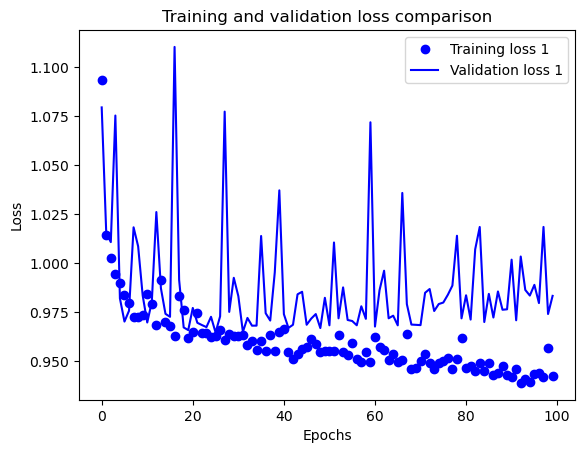

In [64]:
history1_dict = history1.history
loss1 = history1_dict['loss']
val_loss1 = history1_dict['val_loss']

PlotLossComparison(loss1, val_loss1)

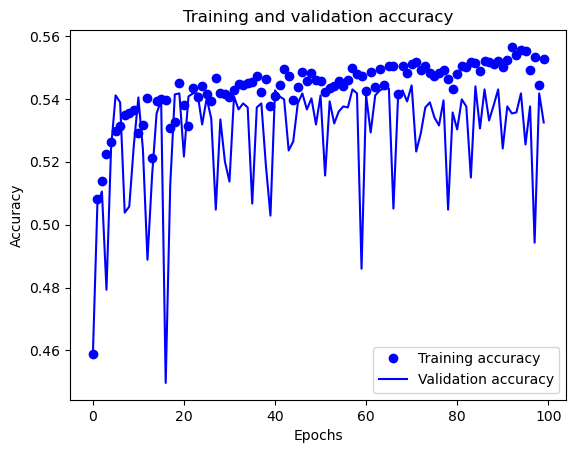

In [65]:
acc1 = history1_dict['accuracy']
val_acc1 = history1_dict['val_accuracy']

PlotAccuracyComparison(acc1, val_acc1)

Nasza sieć zaczyna się przeuczać po około 50 epokach. Wytrenujmy ją jeszcze raz przez 50 epok

In [66]:
model1 = models.Sequential()
model1.add(layers.Dense(1024, activation='relu', input_shape=(len(df.columns.values) - 3,)))
model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dense(256, activation='relu'))
model1.add(layers.Dense(3, activation='softmax'))

model1.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

epochs = 50        # the number of training epochs
batch_size = 128  # the size of mini-batches used for training the network in one step
history1 = model1.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_split=0.2)

Epoch 1/50
99/99 [==============================] - 1s 8ms/step - loss: 1.1062 - accuracy: 0.4483 - val_loss: 1.0982 - val_accuracy: 0.4579
Epoch 2/50
99/99 [==============================] - 0s 4ms/step - loss: 1.0232 - accuracy: 0.4987 - val_loss: 0.9896 - val_accuracy: 0.5287
Epoch 3/50
99/99 [==============================] - 0s 4ms/step - loss: 1.0052 - accuracy: 0.5093 - val_loss: 1.0006 - val_accuracy: 0.5147
Epoch 4/50
99/99 [==============================] - 0s 3ms/step - loss: 0.9945 - accuracy: 0.5227 - val_loss: 0.9734 - val_accuracy: 0.5398
Epoch 5/50
99/99 [==============================] - 0s 3ms/step - loss: 0.9875 - accuracy: 0.5269 - val_loss: 0.9728 - val_accuracy: 0.5357
Epoch 6/50
99/99 [==============================] - 0s 3ms/step - loss: 0.9821 - accuracy: 0.5311 - val_loss: 0.9727 - val_accuracy: 0.5366
Epoch 7/50
99/99 [==============================] - 0s 4ms/step - loss: 0.9779 - accuracy: 0.5320 - val_loss: 0.9734 - val_accuracy: 0.5430
Epoch 8/50
99/99 [==

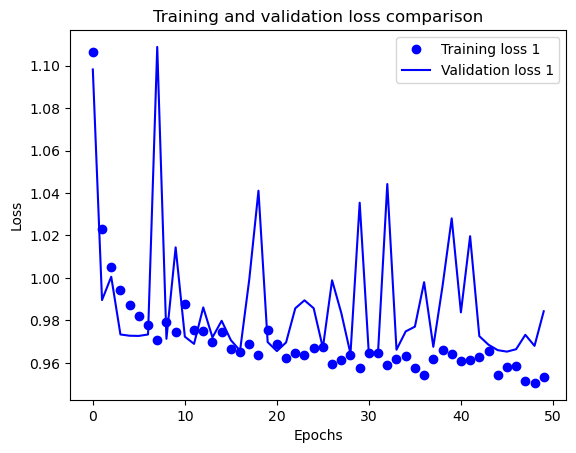

In [67]:
history1_dict = history1.history
loss1 = history1_dict['loss']
val_loss1 = history1_dict['val_loss']

PlotLossComparison(loss1, val_loss1)

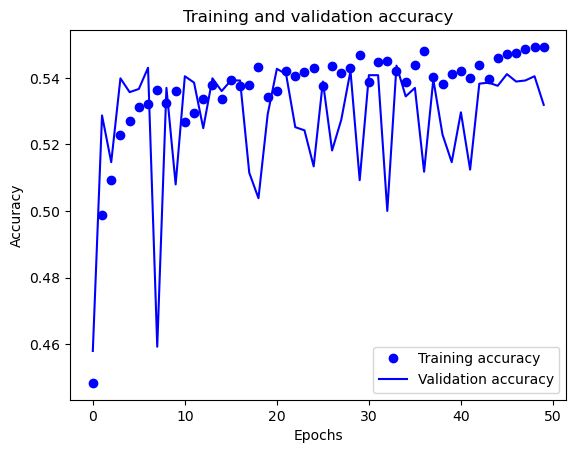

In [68]:
acc1 = history1_dict['accuracy']
val_acc1 = history1_dict['val_accuracy']

PlotAccuracyComparison(acc1, val_acc1)

Teraz nasz model nie przeuczł się za to uzyskał skuteczność na poziomie około 53%, co na pierwszy rzut oka wydaje się słabym wynikiem. Na koniec pokażemy skuteczność bukmacherów, gazet i ludzi, co zmieni nasz punkt widzenia. Celem tego notebook'a będzie uzyskanie skuteczności modelu na poziomie 60%

### Optymalizacja modelu
Jako kolejny etap przygotujmy sobie funkcję, która wyświetli macierz konfuzji.

<b>Macierz konfuzji</b> (`confusion matrix`) pokazuje nam, w ilu przypadkach dane testowe zostały poprawnie zaklasyfikowane (główna przekątna macierzy), w ilu niepoprawnie, oraz wzorce których klas byly najczęściej mylone z wzrocami innych klas. 
Macierz konfuzji pozwala przeanalizować, wzorce których klas są najczęściej błędnie klasyfikowane, oraz pozwalają podjąć działania zmierzające do wzmocnienia/powtórzenia procesu uczenia dla tych najtrudniej klasyfikowanych klas lub wzorców, ew. dokonanie augmentacji dla wzorców tych klas, o ile to możliwe. Dlatego w przypadku problemów klasyfikacji macierz konfuzji powinna zostać dokładnie przeanalizowana, a wnioski wykorzystane do poprawy klasyfikatora. Skupiamy się oczywiście na wzorcach tych klas, gdzie wartości poza główną przekątną macierzy są największe. Pomaga również obejrzenie przykładów testowych błędnie sklasyfikowanych, gdyż może się okazać, iż są błędnie przyporządkowane do etykiet albo nawet człowiek lub nikt nie jest w stanie tego zrobić poprawnie ze względu na słabą jakość, rozmycie lub inne czynniki (przekroczenie tzw. "human-level performance"). 

In [72]:
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
LABELS= ['Win', 'Draw', 'Lost']

# Define the confusion matrix for the results
def show_confusion_matrix(validations, predictions, num_classes):
    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(num_classes, num_classes))
    hm = sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.yticks(rotation = 0)  # Don't rotate (vertically) the y-axis labels
    hm.set_ylim(0, len(matrix))
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

123/123 [==============================] - 0s 2ms/step


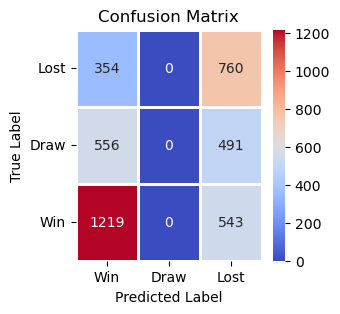

              precision    recall  f1-score   support

           0       0.57      0.69      0.63      1762
           1       0.00      0.00      0.00      1047
           2       0.42      0.68      0.52      1114

    accuracy                           0.50      3923
   macro avg       0.33      0.46      0.38      3923
weighted avg       0.38      0.50      0.43      3923



D:\Programs\miniconda3\envs\nn_football\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programs\miniconda3\envs\nn_football\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programs\miniconda3\envs\nn_football\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
test_results_pred = model1.predict(X_test)

# Take the class with the highest probability from the test predictions as a winning one
max_test_results_pred = np.argmax(test_results_pred, axis=1)
max_test_results = np.argmax(y_test, axis=1)


# Show the confusion matrix of the collected results
show_confusion_matrix(max_test_results, max_test_results_pred, num_classes=3)

# Print classification report
print(classification_report(max_test_results, max_test_results_pred))

Jak wygląda liczba przypadków w naszym zbiorze treningowym?

In [83]:
np.sum(y_train, axis=0)

array([7241, 3906, 4542], dtype=uint32)

Nie wiemy jak wygląda zbiór walidacyjny, stanowi on 20% zbioru testowego, lecz nie wiem jak dużo meczy danego typu wpada do niego. Dlatego utwórzmy ten zbiór ręcznie

In [84]:
y_train.shape

(15689, 3)

In [85]:
X_val = X_train[-3000:]
y_val = y_train[-3000:]
X_train = X_train[:-3000]
y_train = y_train[:-3000]

Popatrzmy teraz jak rozkładają się mecze w zbiorze walidacyjnym

In [86]:
np.sum(y_val, axis=0)

array([1375,  757,  868], dtype=uint32)

Wygląda na to, że zbiór walidacyjny jest w porządku. Nauczmy jeszcze raz naszą sieć używając tego zbioru jako zbioru walidacyjnego

In [89]:
model1 = models.Sequential()
model1.add(layers.Dense(1024, activation='relu', input_shape=(len(df.columns.values) - 3,)))
model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dense(256, activation='relu'))
model1.add(layers.Dense(3, activation='softmax'))

model1.summary()

model1.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

epochs = 100        # the number of training epochs
batch_size = 128  # the size of mini-batches used for training the network in one step
history1 = model1.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_data=(X_val, y_val))

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 1024)              886784    
                                                                 
 dense_23 (Dense)            (None, 512)               524800    
                                                                 
 dense_24 (Dense)            (None, 256)               131328    
                                                                 
 dense_25 (Dense)            (None, 3)                 771       
                                                                 
Total params: 1,543,683
Trainable params: 1,543,683
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
100/100 [==============================] - 1s 7ms/step - loss: 1.1009 - accuracy: 0.4488 - val_loss: 1.0941 - val_accuracy: 0.3650
Epoch 2/100
100/100 [============

100/100 [==============================] - 0s 4ms/step - loss: 0.9539 - accuracy: 0.5472 - val_loss: 0.9671 - val_accuracy: 0.5417
Epoch 52/100
100/100 [==============================] - 0s 4ms/step - loss: 0.9488 - accuracy: 0.5504 - val_loss: 0.9688 - val_accuracy: 0.5437
Epoch 53/100
100/100 [==============================] - 0s 4ms/step - loss: 0.9555 - accuracy: 0.5406 - val_loss: 1.0305 - val_accuracy: 0.5057
Epoch 54/100
100/100 [==============================] - 0s 4ms/step - loss: 0.9614 - accuracy: 0.5411 - val_loss: 0.9670 - val_accuracy: 0.5447
Epoch 55/100
100/100 [==============================] - 0s 4ms/step - loss: 0.9496 - accuracy: 0.5481 - val_loss: 0.9693 - val_accuracy: 0.5327
Epoch 56/100
100/100 [==============================] - 0s 4ms/step - loss: 0.9490 - accuracy: 0.5477 - val_loss: 1.0015 - val_accuracy: 0.5133
Epoch 57/100
100/100 [==============================] - 0s 4ms/step - loss: 0.9532 - accuracy: 0.5455 - val_loss: 0.9663 - val_accuracy: 0.5403
Epoch

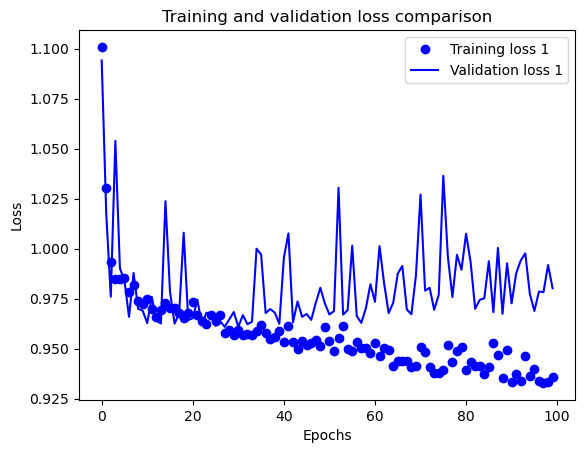

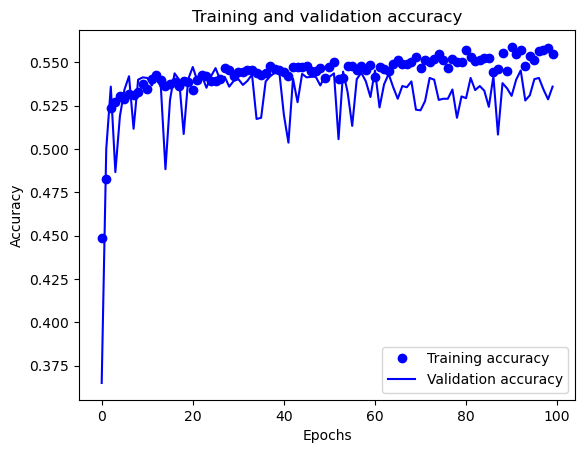

In [90]:
history1_dict = history1.history
loss1 = history1_dict['loss']
val_loss1 = history1_dict['val_loss']
acc1 = history1_dict['accuracy']
val_acc1 = history1_dict['val_accuracy']

PlotLossComparison(loss1, val_loss1)
PlotAccuracyComparison(acc1, val_acc1)

Co się stanie, gdy zmniejszymy learning rate?

In [103]:
model1 = models.Sequential()
model1.add(layers.Dense(1024, activation='relu', input_shape=(len(df.columns.values) - 3,)))
model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dense(256, activation='relu'))
model1.add(layers.Dense(3, activation='softmax'))

model1.summary()

opt = keras.optimizers.Adam(learning_rate=0.00001)
model1.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

epochs = 100        # the number of training epochs
batch_size = 128  # the size of mini-batches used for training the network in one step
history1 = model1.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_data=(X_val, y_val))

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 1024)              886784    
                                                                 
 dense_43 (Dense)            (None, 512)               524800    
                                                                 
 dense_44 (Dense)            (None, 256)               131328    
                                                                 
 dense_45 (Dense)            (None, 3)                 771       
                                                                 
Total params: 1,543,683
Trainable params: 1,543,683
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
100/100 [==============================] - 1s 7ms/step - loss: 1.0513 - accuracy: 0.4647 - val_loss: 1.0390 - val_accuracy: 0.4610
Epoch 2/100
100/100 [===========

100/100 [==============================] - 0s 5ms/step - loss: 0.9421 - accuracy: 0.5514 - val_loss: 0.9613 - val_accuracy: 0.5387
Epoch 52/100
100/100 [==============================] - 1s 5ms/step - loss: 0.9390 - accuracy: 0.5547 - val_loss: 0.9624 - val_accuracy: 0.5397
Epoch 53/100
100/100 [==============================] - 0s 5ms/step - loss: 0.9386 - accuracy: 0.5532 - val_loss: 0.9631 - val_accuracy: 0.5403
Epoch 54/100
100/100 [==============================] - 0s 4ms/step - loss: 0.9377 - accuracy: 0.5571 - val_loss: 0.9696 - val_accuracy: 0.5390
Epoch 55/100
100/100 [==============================] - 0s 5ms/step - loss: 0.9376 - accuracy: 0.5565 - val_loss: 0.9679 - val_accuracy: 0.5377
Epoch 56/100
100/100 [==============================] - 0s 4ms/step - loss: 0.9368 - accuracy: 0.5552 - val_loss: 0.9648 - val_accuracy: 0.5387
Epoch 57/100
100/100 [==============================] - 0s 4ms/step - loss: 0.9373 - accuracy: 0.5566 - val_loss: 0.9691 - val_accuracy: 0.5400
Epoch

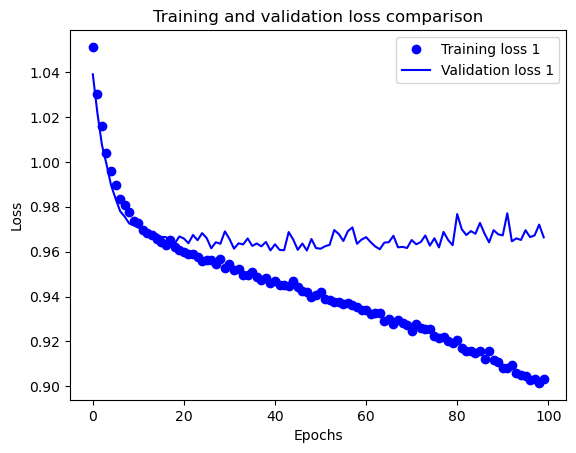

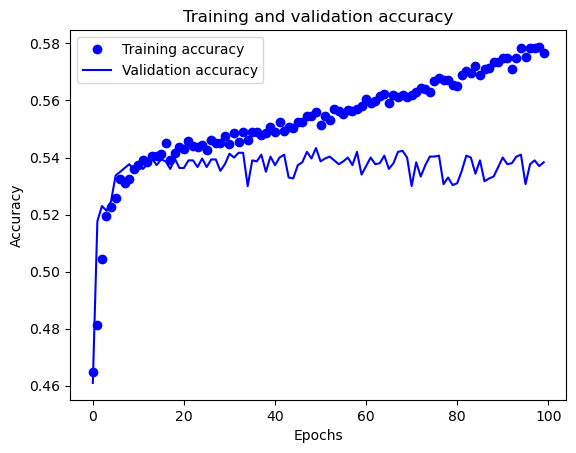

In [104]:
history1_dict = history1.history
loss1 = history1_dict['loss']
val_loss1 = history1_dict['val_loss']
acc1 = history1_dict['accuracy']
val_acc1 = history1_dict['val_accuracy']

PlotLossComparison(loss1, val_loss1)
PlotAccuracyComparison(acc1, val_acc1)

In [105]:
test_loss, test_acc = model1.evaluate(X_test, y_test)

123/123 [==============================] - 0s 4ms/step - loss: 0.9961 - accuracy: 0.5218


Po zmniejszeniu learning_rate do 10^-5 po 20 epokach nasz model zaczyna zbyt nadmiernie dopasowywać się do zbioru, a accuracy zbioru walidacyjnego zatrzymuje się na 53%. Czy zmniejszenie złożoności modelu rozwiąże problem?

In [107]:
model1 = models.Sequential()
model1.add(layers.Dense(1024, activation='relu', input_shape=(len(df.columns.values) - 3,)))
model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dense(3, activation='softmax'))

model1.summary()

opt = keras.optimizers.Adam(learning_rate=0.00001)
model1.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

epochs = 100        # the number of training epochs
batch_size = 128  # the size of mini-batches used for training the network in one step
history1 = model1.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_data=(X_val, y_val))

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_49 (Dense)            (None, 1024)              886784    
                                                                 
 dense_50 (Dense)            (None, 512)               524800    
                                                                 
 dense_51 (Dense)            (None, 3)                 1539      
                                                                 
Total params: 1,413,123
Trainable params: 1,413,123
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
100/100 [==============================] - 1s 7ms/step - loss: 1.0514 - accuracy: 0.4649 - val_loss: 1.0384 - val_accuracy: 0.4760
Epoch 2/100
100/100 [==============================] - 0s 3ms/step - loss: 1.0294 - accuracy: 0.4874 - val_loss: 1.0217 - val_accuracy: 0.4993
Epoch 3/100
100/100 [

100/100 [==============================] - 0s 3ms/step - loss: 0.9450 - accuracy: 0.5506 - val_loss: 0.9628 - val_accuracy: 0.5437
Epoch 53/100
100/100 [==============================] - 0s 3ms/step - loss: 0.9442 - accuracy: 0.5544 - val_loss: 0.9785 - val_accuracy: 0.5337
Epoch 54/100
100/100 [==============================] - 0s 4ms/step - loss: 0.9459 - accuracy: 0.5509 - val_loss: 0.9643 - val_accuracy: 0.5387
Epoch 55/100
100/100 [==============================] - 0s 3ms/step - loss: 0.9440 - accuracy: 0.5513 - val_loss: 0.9688 - val_accuracy: 0.5403
Epoch 56/100
100/100 [==============================] - 0s 4ms/step - loss: 0.9435 - accuracy: 0.5497 - val_loss: 0.9639 - val_accuracy: 0.5443
Epoch 57/100
100/100 [==============================] - 0s 3ms/step - loss: 0.9429 - accuracy: 0.5509 - val_loss: 0.9633 - val_accuracy: 0.5423
Epoch 58/100
100/100 [==============================] - 0s 4ms/step - loss: 0.9425 - accuracy: 0.5505 - val_loss: 0.9656 - val_accuracy: 0.5377
Epoch

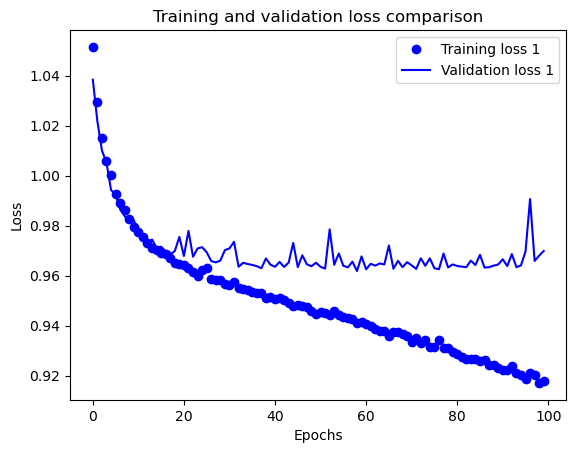

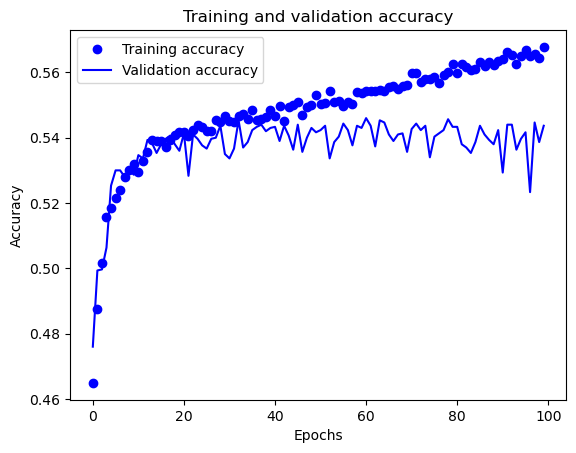

In [108]:
history1_dict = history1.history
loss1 = history1_dict['loss']
val_loss1 = history1_dict['val_loss']
acc1 = history1_dict['accuracy']
val_acc1 = history1_dict['val_accuracy']

PlotLossComparison(loss1, val_loss1)
PlotAccuracyComparison(acc1, val_acc1)

Zmniejszenie liczby wartstw ukrytych nic nie zmieniło, czy zwiększenie złożoności modelu coś zmieni?

In [129]:
model1 = models.Sequential()
model1.add(layers.Dense(256, activation='elu', input_shape=(len(df.columns.values) - 3,)))
model1.add(layers.Dropout(0.3))
model1.add(layers.Dense(128, activation='elu'))
model1.add(layers.Dropout(0.3))
model1.add(layers.Dense(64, activation='elu'))
model1.add(layers.Dropout(0.3))
model1.add(layers.Dense(32, activation='elu'))
model1.add(layers.Dropout(0.3))
model1.add(layers.Dense(16, activation='elu'))
model1.add(layers.Dropout(0.3))
model1.add(layers.Dense(8, activation='elu'))
model1.add(layers.Dropout(0.3))
model1.add(layers.Dense(4, activation='elu'))
model1.add(layers.Dense(3, activation='softmax'))

model1.summary()

opt = keras.optimizers.Adam(learning_rate=0.001)
model1.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

epochs = 300        # the number of training epochs
batch_size = 128  # the size of mini-batches used for training the network in one step
history1 = model1.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_data=(X_val, y_val))

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_170 (Dense)           (None, 256)               221696    
                                                                 
 dropout_68 (Dropout)        (None, 256)               0         
                                                                 
 dense_171 (Dense)           (None, 128)               32896     
                                                                 
 dropout_69 (Dropout)        (None, 128)               0         
                                                                 
 dense_172 (Dense)           (None, 64)                8256      
                                                                 
 dropout_70 (Dropout)        (None, 64)                0         
                                                                 
 dense_173 (Dense)           (None, 32)              

100/100 [==============================] - 0s 5ms/step - loss: 0.9861 - accuracy: 0.5332 - val_loss: 0.9745 - val_accuracy: 0.5317
Epoch 43/300
100/100 [==============================] - 0s 5ms/step - loss: 0.9790 - accuracy: 0.5427 - val_loss: 0.9661 - val_accuracy: 0.5400
Epoch 44/300
100/100 [==============================] - 0s 5ms/step - loss: 0.9784 - accuracy: 0.5393 - val_loss: 0.9658 - val_accuracy: 0.5387
Epoch 45/300
100/100 [==============================] - 0s 5ms/step - loss: 0.9774 - accuracy: 0.5357 - val_loss: 0.9780 - val_accuracy: 0.5270
Epoch 46/300
100/100 [==============================] - 1s 5ms/step - loss: 0.9817 - accuracy: 0.5335 - val_loss: 0.9666 - val_accuracy: 0.5403
Epoch 47/300
100/100 [==============================] - 1s 5ms/step - loss: 0.9817 - accuracy: 0.5346 - val_loss: 0.9680 - val_accuracy: 0.5407
Epoch 48/300
100/100 [==============================] - 1s 5ms/step - loss: 0.9759 - accuracy: 0.5396 - val_loss: 0.9647 - val_accuracy: 0.5410
Epoch

Epoch 99/300
100/100 [==============================] - 1s 8ms/step - loss: 0.9661 - accuracy: 0.5393 - val_loss: 0.9667 - val_accuracy: 0.5390
Epoch 100/300
100/100 [==============================] - 1s 6ms/step - loss: 0.9659 - accuracy: 0.5431 - val_loss: 0.9660 - val_accuracy: 0.5393
Epoch 101/300
100/100 [==============================] - 1s 7ms/step - loss: 0.9663 - accuracy: 0.5411 - val_loss: 0.9728 - val_accuracy: 0.5327
Epoch 102/300
100/100 [==============================] - 1s 6ms/step - loss: 0.9623 - accuracy: 0.5450 - val_loss: 0.9728 - val_accuracy: 0.5340
Epoch 103/300
100/100 [==============================] - 1s 7ms/step - loss: 0.9599 - accuracy: 0.5466 - val_loss: 0.9652 - val_accuracy: 0.5387
Epoch 104/300
100/100 [==============================] - 1s 6ms/step - loss: 0.9598 - accuracy: 0.5487 - val_loss: 0.9649 - val_accuracy: 0.5363
Epoch 105/300
100/100 [==============================] - 1s 5ms/step - loss: 0.9633 - accuracy: 0.5454 - val_loss: 0.9652 - val_acc

100/100 [==============================] - 0s 5ms/step - loss: 0.9505 - accuracy: 0.5542 - val_loss: 0.9696 - val_accuracy: 0.5343
Epoch 156/300
100/100 [==============================] - 0s 5ms/step - loss: 0.9542 - accuracy: 0.5498 - val_loss: 0.9666 - val_accuracy: 0.5390
Epoch 157/300
100/100 [==============================] - 0s 5ms/step - loss: 0.9546 - accuracy: 0.5510 - val_loss: 0.9671 - val_accuracy: 0.5420
Epoch 158/300
100/100 [==============================] - 0s 5ms/step - loss: 0.9457 - accuracy: 0.5534 - val_loss: 0.9704 - val_accuracy: 0.5397
Epoch 159/300
100/100 [==============================] - 0s 5ms/step - loss: 0.9539 - accuracy: 0.5515 - val_loss: 0.9672 - val_accuracy: 0.5413
Epoch 160/300
100/100 [==============================] - 0s 5ms/step - loss: 0.9539 - accuracy: 0.5527 - val_loss: 0.9650 - val_accuracy: 0.5417
Epoch 161/300
100/100 [==============================] - 0s 5ms/step - loss: 0.9523 - accuracy: 0.5545 - val_loss: 0.9729 - val_accuracy: 0.5337

100/100 [==============================] - 1s 5ms/step - loss: 0.9420 - accuracy: 0.5565 - val_loss: 0.9707 - val_accuracy: 0.5397
Epoch 212/300
100/100 [==============================] - 1s 5ms/step - loss: 0.9422 - accuracy: 0.5569 - val_loss: 0.9828 - val_accuracy: 0.5263
Epoch 213/300
100/100 [==============================] - 0s 5ms/step - loss: 0.9419 - accuracy: 0.5576 - val_loss: 0.9742 - val_accuracy: 0.5380
Epoch 214/300
100/100 [==============================] - 1s 9ms/step - loss: 0.9391 - accuracy: 0.5602 - val_loss: 0.9771 - val_accuracy: 0.5320
Epoch 215/300
100/100 [==============================] - 1s 10ms/step - loss: 0.9417 - accuracy: 0.5577 - val_loss: 0.9704 - val_accuracy: 0.5370
Epoch 216/300
100/100 [==============================] - 1s 5ms/step - loss: 0.9451 - accuracy: 0.5558 - val_loss: 0.9880 - val_accuracy: 0.5177
Epoch 217/300
100/100 [==============================] - 1s 6ms/step - loss: 0.9427 - accuracy: 0.5560 - val_loss: 0.9734 - val_accuracy: 0.536

100/100 [==============================] - 0s 5ms/step - loss: 0.9319 - accuracy: 0.5647 - val_loss: 0.9896 - val_accuracy: 0.5357
Epoch 268/300
100/100 [==============================] - 0s 5ms/step - loss: 0.9316 - accuracy: 0.5662 - val_loss: 0.9741 - val_accuracy: 0.5383
Epoch 269/300
100/100 [==============================] - 0s 5ms/step - loss: 0.9284 - accuracy: 0.5669 - val_loss: 0.9791 - val_accuracy: 0.5333
Epoch 270/300
100/100 [==============================] - 0s 5ms/step - loss: 0.9309 - accuracy: 0.5629 - val_loss: 0.9771 - val_accuracy: 0.5347
Epoch 271/300
100/100 [==============================] - 0s 5ms/step - loss: 0.9270 - accuracy: 0.5668 - val_loss: 0.9838 - val_accuracy: 0.5357
Epoch 272/300
100/100 [==============================] - 0s 5ms/step - loss: 0.9405 - accuracy: 0.5580 - val_loss: 0.9774 - val_accuracy: 0.5393
Epoch 273/300
100/100 [==============================] - 1s 5ms/step - loss: 0.9309 - accuracy: 0.5646 - val_loss: 0.9774 - val_accuracy: 0.5363

In [130]:
test_loss, test_acc = model1.evaluate(X_test, y_test)

123/123 [==============================] - 0s 3ms/step - loss: 1.0075 - accuracy: 0.5152


Widzimy, że nasza sieć tak na prawdę nauczyła się typować tylko zwycięstwo lub porażkę. Spróbujmy zmniejszyć nasz zbiór do jednej ligi niech będzie to Premier League, ponieważ najwięcej meczy jest właśnie stąd. Zrobimy to, ponieważ gra w różnych ligach różni się od siebie. Do tego zmniejszymy liczbę atrybutów zostawiając tylko overall każdego zawodnika, ponieważ zmniejszy się liczba przykładów uczących

## Inne podejście - model LSTM

In [ ]:
len(df.columns.values) - 3

In [ ]:
X_train.shape

In [ ]:
X_train_array = X_train.values
X_train_array.shape

In [ ]:
X_train_array = X_train_array.reshape((X_train_array.shape[0], 5, 173))
X_train_array.shape

In [ ]:
X_test.shape

In [ ]:
X_test_array = X_test.values
X_test_array.shape

In [ ]:
X_test_array = X_test_array.reshape((X_test_array.shape[0], 5, 173))
X_test_array.shape

In [ ]:
model2 = models.Sequential()
model2.add(layers.LSTM(865, activation='elu', input_shape=(5, 173,)))
model2.add(layers.Dense(600, activation='elu'))
model2.add(layers.Reshape((5, 120)))
model2.add(layers.Dropout(0.1))
model2.add(layers.LSTM(600, activation='elu', input_shape=(5, 120,)))
model2.add(layers.Dense(400, activation='elu'))
model2.add(layers.Reshape((5, 80)))
model2.add(layers.Dropout(0.1))
model2.add(layers.LSTM(200, activation='elu', input_shape=(5, 80,)))
model2.add(layers.Dense(100, activation='elu'))
model2.add(layers.Dropout(0.1))
model2.add(layers.Dense(3, activation='softmax'))

model2.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

epochs = 100        # the number of training epochs
batch_size = 128  # the size of mini-batches used for training the network in one step
history2 = model2.fit(X_train_array, y_train, epochs = epochs, batch_size = batch_size, validation_data=(X_test_array, y_test))

In [ ]:
history2_dict = history2.history
loss2 = history2_dict['loss']
val_loss2 = history2_dict['val_loss']

PlotLossComparison(loss2, val_loss2)

In [ ]:
acc2 = history2_dict['accuracy']
val_acc2 = history2_dict['val_accuracy']

PlotAccuracyComparison(acc2, val_acc2)